In [3]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

<font color='red'> 
# Machine Learning: Unsupervised learning 
# (Part I)
<font\>

### Why studying clustering? ###

**Use and applications:** 
This task has many applications in different domains:

+ Categorize **documents** of similar topics.
+ Group **individuals** that have similar political view.
+ **Social network** analysis.
+ **Market segmentation**/ building customer profiles for market analysis.
+ Detection of **near duplicates**.
+ Group **genes** that perform the same function.
+ **Astronomical** data analysis.
+ **Compression**.


<center><img src="images/facebook.png"></center>
<center><small>Facebook networks.</small></center>


## INDEX:##

1. **Introduction to unsupervised learning**

2. Clustering

 2.1 Important questions in clustering

 2.2 Similarity and distance

 2.3 Clustering techniques - k-means

 2.4 Quality evaluation
 
 2.5 Limitaciones: dimensionality reduction by principal component analysis

 2.6 Hierarchical clustering

 2.7 Spectral clustering

 2.8 Comparing different clustering algorithms on toy datasets
 
3. CASE STUDY: EUROSTAT data

3.1 Applying K-means to the case study

3.2 Applying hierarchical clustering 

In [2]:
from IPython.display import HTML

HTML('http://blog.stephenwolfram.com/2013/04/data-science-of-the-facebook-world/')

# 1. Introduction to unsupervised learning

In machine learning, the problem of unsupervised learning is that of trying to **find hidden structure in unlabeled data**. Since the examples given to the learner are unlabeled, there is **no error or reward signal** to evaluate a potential solution. This distinguishes unsupervised learning from supervised learning. 

Unsupervised learning is defined as the set of algorithms which learns from a **training set of unlableled or unannotated** examples, using the features of the inputs to categorize them together according to some **geometric** or **statistical** criteria. 

Unsupervised learning encompasses many techniques that seek to **summarize and explain key features** of the data. Many methods employed in unsupervised learning are based on *data mining* methods used to preprocess data.

Different *kinds* of unsupervised learning problems:

+ *Clustering:* partition examples into groups when no pre-defined categories/classes are available.
+ *Dimensionality reduction:* principal component analysis, independent component analysis, non-negative matrix factorization.
+ *Outlier detection:* find unusual events (e.g. malfunction).
+ *Novelty detection:* find changes in data.

The most common unsupervised task is **clustering**. In this notebook, we will focus on the clustering and dimensionality reduction (in brief) tasks.

<center><img src="images/clustering of genes.gif">
</center>
<center><small>(a) The data set contains four clusters of different sizes, shapes and numbers of genes. Left: each dot represents a gene, plotted against its expression value under the two experimental conditions. Euclidean distance, which corresponds to the straight-line distance between points in this graph, was used for clustering. Right: the standard red-green representation of the data and corresponding cluster identities. (b) Hierarchical clustering finds an entire hierarchy of clusters. The tree was cut at the level indicated to yield four clusters. Some of the superclusters and subclusters are illustrated on the left. (c) k-means (with k = 4) partitions the space into four subspaces, depending on which of the four cluster centroids (stars) is closest. (d) SOM finds clusters, which are organized into a grid structure (in this case a simple 2 times 2 grid).

From the following article:
How does gene expression clustering work?
Patrik D'haeseleer, [Nature Biotechnology 23, 1499 - 1501 (2005)](http://www.nature.com/nbt/journal/v23/n12/fig_tab/nbt1205-1499_F1.html)
doi:10.1038/nbt1205-1499
        </small></center>

# 2. Clustering

**Partition** unlabeled examples into *disjoint subsets of clusters*, such that:

+ Examples within a cluster are similar (*high intra-class* similarity).
+ Examples in different clusters are different (*low inter-class* similarity).

It can help in discovering new categories in an unsupervised manner (no sample category labels provided).

## 2.1 Important questions in clustering

+ What is a *natural grouping* among these objects? 
    + Definition of "groupness"
    + Definition of "similarity/distance"

+ *How to group* samples?

+ *How many* clusters?
    + Fixed a priori?
    + Completely data driven?
    + Avoid “trivial” clusters - too large or small...
    + Which methods do work when the number of samples is huge?
    + Which methods do work when the number of classes is huge?, etc.

+ *What* is a *good grouping*? 
    + What objective measures can be defined to evaluate the quality of the clusters?

+ In which space to *group*? 
    + What to do in high-dimensional feature spaces?
 

<div class="alert alert-info"> **IMPORTANT IDEA: ** Clustering is subjective issue.
</div>

Clustering will help us to analyze and get insight of the data, but the quality of the partition **depends on the application and the analyst**.

## 2.2 Similarity and distance

The notion of similarity is a tough one, however we can use the notion of distance as a surrogate.

The most wide spread distance metric is the Minkowski distance:

$$d(a,b) = \big(\sum\limits_{i=1}^d |a_i-b_i|^p \big)^{1/p}$$

The most well-known instantiations of this metric are: 

+ $p = 2$ we have Euclidean distance, 
+ $p=1$ Manhattan distance, and 
+ $p=\infty$ max-distance.

## 2.3 Clustering techniques: how to group samples?

<center><img src="images/clustering of genes.gif">
</center>
<center><small>(a) The data set contains four clusters of different sizes, shapes and numbers of genes. Left: each dot represents a gene, plotted against its expression value under the two experimental conditions. Euclidean distance, which corresponds to the straight-line distance between points in this graph, was used for clustering. Right: the standard red-green representation of the data and corresponding cluster identities. (b) Hierarchical clustering finds an entire hierarchy of clusters. The tree was cut at the level indicated to yield four clusters. Some of the superclusters and subclusters are illustrated on the left. (c) k-means (with k = 4) partitions the space into four subspaces, depending on which of the four cluster centroids (stars) is closest. (d) SOM finds clusters, which are organized into a grid structure (in this case a simple 2 times 2 grid).

From the following article:
How does gene expression clustering work?
Patrik D'haeseleer, [Nature Biotechnology 23, 1499 - 1501 (2005)](http://www.nature.com/nbt/journal/v23/n12/fig_tab/nbt1205-1499_F1.html)
doi:10.1038/nbt1205-1499
        </small></center>

There are two big families of clustering techniques:

+ **Partitional algorithms:** Start with a random partititon and refine it iteratively.
+ **Hierarchical algorithms:** Agglomerative (bottom-up), top-down.

### 2.3.1 Partitional algorithms

Partitional algorithms can be divided in two branches:

+ Hard partition algorithms, such as *K-means*, assign a unique cluster value to each element in the feature space.
+ Soft partition algorithms, such as *Mixture of Gaussians*, can be viewed as density estimators and assign a confidence or probability to each point in the space.

In order to build our intuition about clustering, we will start with the simplest, but one of the famest methods: K-means.

### 2.3.2 K-means algorithm

**Algorithm:**
1. Initialize the value  $K$ of desirable clusters.
2. Initialize the $K$ cluster centers, e.g. randomly.
3. Decide the class memberships of the N data samples by assigning them to the nearest cluster centroids (e.g. the center of gravity or mean).
4. Re-estimate the $K$ cluster centers, by assuming the memberships found above are correct.
5. If none of the N objects changed membership in the last iteration, exit. Otherwise go to 3.

Let us see this in action:

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

#Create some data
MAXN=40
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,3]+1.2*np.random.randn(MAXN,2)])
X.shape

(120, 2)

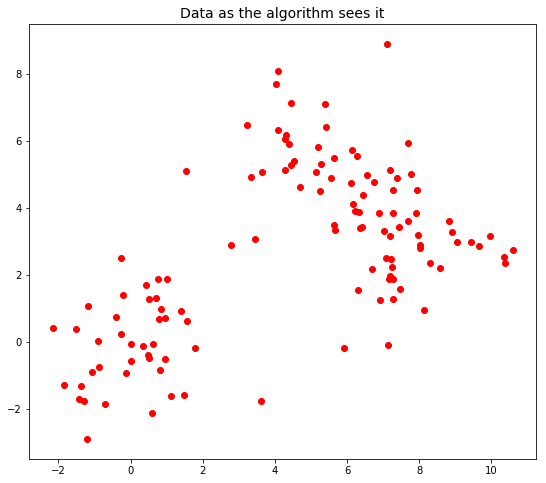

In [4]:
#Just for visualization purposes, create the labels of the three distributions
y = np.concatenate([np.ones((MAXN,1)),2*np.ones((MAXN,1))])
y = np.concatenate([y,3*np.ones((MAXN,1))])

plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='r')
plt.title('Data as the algorithm sees it', size=14)
plt.gcf().set_size_inches((20,8))


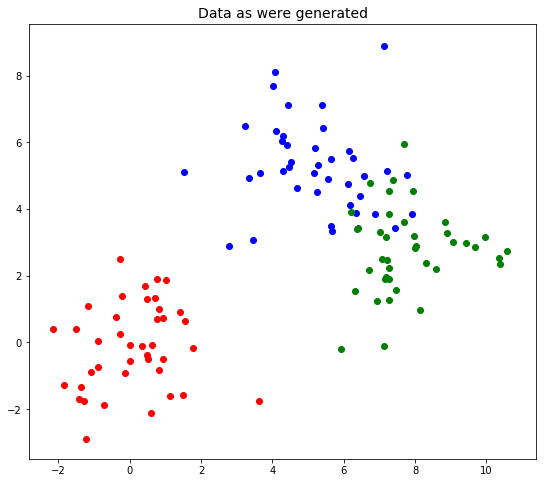

In [5]:
plt.subplot(1,2,2)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.title('Data as were generated',size=14)
plt.gcf().set_size_inches((20,8))



In [6]:
from sklearn import cluster

K=3 # Assuming to be 3 clusters!

clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(X)

KMeans(copy_x=True, init='random', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

**Note**: Each clustering algorithm comes in two variants: a class, that implements the *fit* method to learn the clusters on train data, and a *predict* function, that, given test data, returns an array of integer labels corresponding to the different clusters. For the class, the labels over the training data can be found in the *labels_* attribute.
    

In [7]:
print(clf.labels_)    # or
print(clf.predict(X)) # equivalent

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 2 1 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 1 2 1
 1 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 2 1 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 1 2 1
 1 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


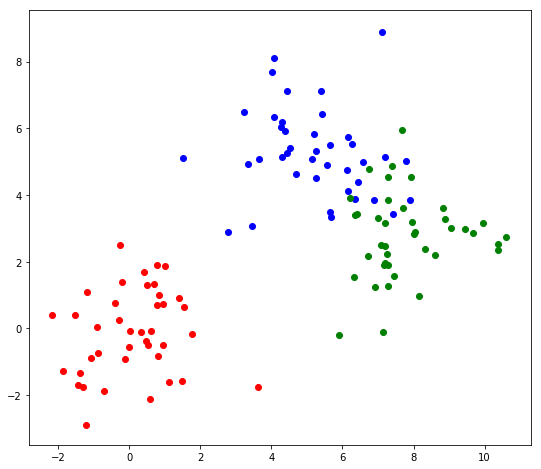

In [8]:
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

fig = plt.gcf()
fig.set_size_inches((9,8))

In [9]:
x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()] # c_ translates slice objects to concatenation along the second axis.
print(data)

[[ -5.          -5.        ]
 [ -4.89949749  -5.        ]
 [ -4.79899497  -5.        ]
 ..., 
 [ 14.79899497  15.        ]
 [ 14.89949749  15.        ]
 [ 15.          15.        ]]


In [10]:
Z=clf.predict(data) # returns the labels of the data
print(Z)

[0 0 0 ..., 2 2 2]


**How many "misclusterings" do we have?**

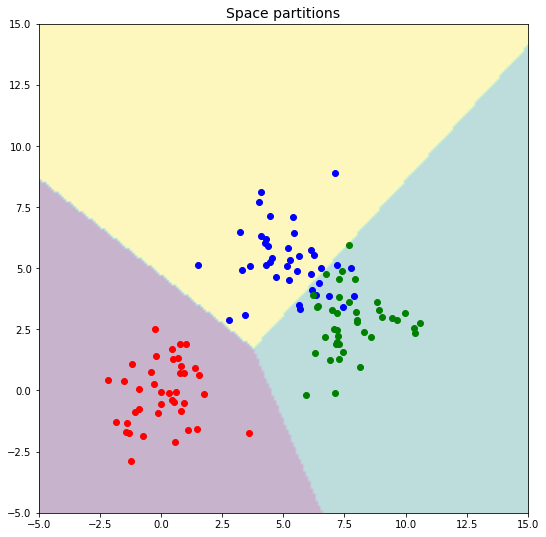

In [11]:
# Visualize space partition
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

fig = plt.gcf()
fig.set_size_inches((9,9))

Let's perform a hand-made step by step analysis:

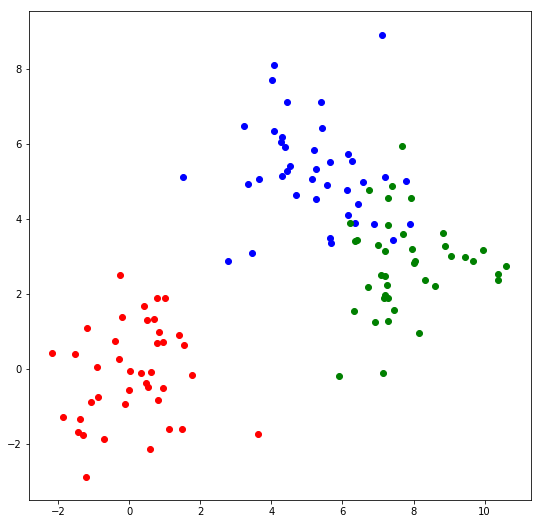

In [12]:
# Select centroids

from sklearn import cluster
from scipy.spatial.distance import cdist
K=3

#Select three centroids: for example, the first three elements of the data and visualize them by black circles
C=X[:3,:]

plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120, facecolors='none', linewidths=2, zorder=10)

fig = plt.gcf()
fig.set_size_inches((9,9))

In [13]:
# Determine partition according to centroids
x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]
Y = cdist(data, C, 'euclidean') 
                            #Computes distance between each pair of the two collections of inputs.
print(Y)

[[  8.52362483   8.32914806   9.2157007 ]
 [  8.45659406   8.24754613   9.12174642]
 [  8.39023167   8.16636567   9.02793318]
 ..., 
 [ 19.63170749  19.98445379  20.13249719]
 [ 19.70394476  20.05007233  20.18846846]
 [ 19.77642893  20.11597895  20.24478392]]


In [14]:
Z = np.argmin(Y,axis=1) 
print(Z)

[1 1 1 ..., 0 0 0]


In [15]:
print('Obtained labels: ', Z)
print(Z.reshape(sz))

('Obtained labels: ', array([1, 1, 1, ..., 0, 0, 0]))
[[1 1 1 ..., 2 2 2]
 [1 1 1 ..., 2 2 2]
 [1 1 1 ..., 2 2 2]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


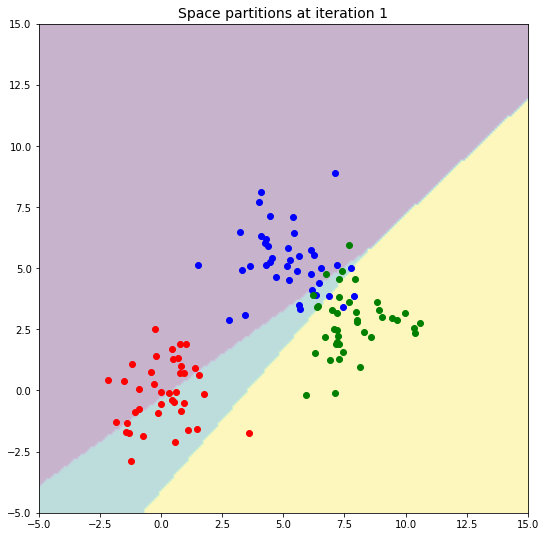

In [16]:
# Visualize
plt.title('Space partitions at iteration 1', size=14)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120, facecolors='none', linewidths=2)

fig = plt.gcf()
fig.set_size_inches((9,9))

In [17]:
#Compute membership for next iteration
Y = cdist(X, C, 'euclidean')
y_pred = np.argmin(Y,axis=1) #finds the minimum in each row, that is the closest center
print(y_pred)

[0 1 2 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1
 0 0 0 2 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2
 0 0 0 2 0 0 1 1 2 1 1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2]


In [18]:
#Update centroids
for i in range(K):
    C[i,:]=np.mean(X[y_pred==i,:],axis=0)

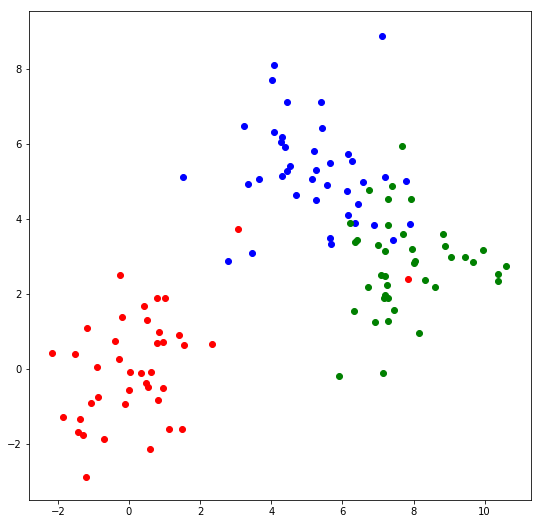

In [19]:
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120, facecolors='none',linewidths=2,zorder=10)

fig = plt.gcf()
fig.set_size_inches((9,9))

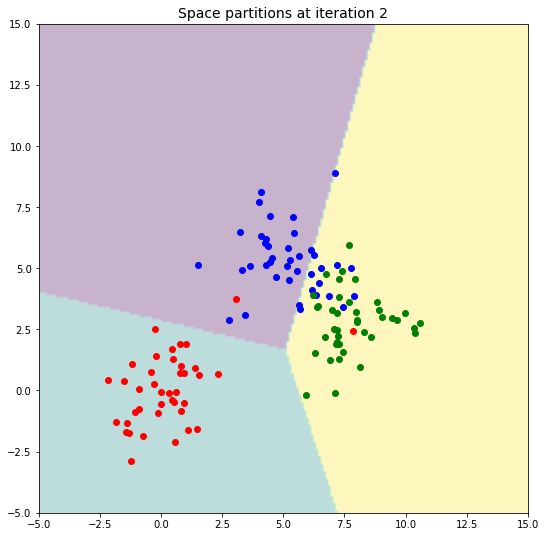

In [20]:
#And the new area of influence
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r') # painting original labels with colors
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

#Painting seeds
plt.scatter(C[:,0],C[:,1],s=120, 
           facecolors='none', 
           linewidths=2,zorder=10)

#Painting the hyperplanes
x = np.linspace(-5,15,200) 
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]
Y = cdist(data, C, 'euclidean')
Z = np.argmin(Y,axis=1) # Determine to whom centroid each point is closest

#Visualize
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions at iteration 2', size=14)
fig = plt.gcf()
fig.set_size_inches((9,9))

 This process is repeated until the centroid stabilizes.

**The extracted algorithm:**

In [21]:
clf = cluster.KMeans(n_clusters=K, random_state=0) #initialize the k-means clustering
clf.fit(X) #run the k-means clustering

data=np.c_[XX.ravel(),YY.ravel()] 
Z=clf.predict(data) # returns the clustering labels of the data

**Visualizing true labels by colored points and space tesselation:**

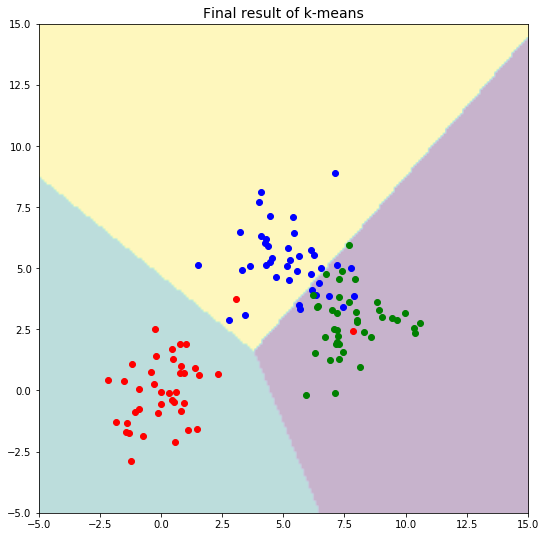

In [22]:
plt.title('Final result of k-means', size=14)

plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)

x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
fig = plt.gcf()
fig.set_size_inches((9,9))

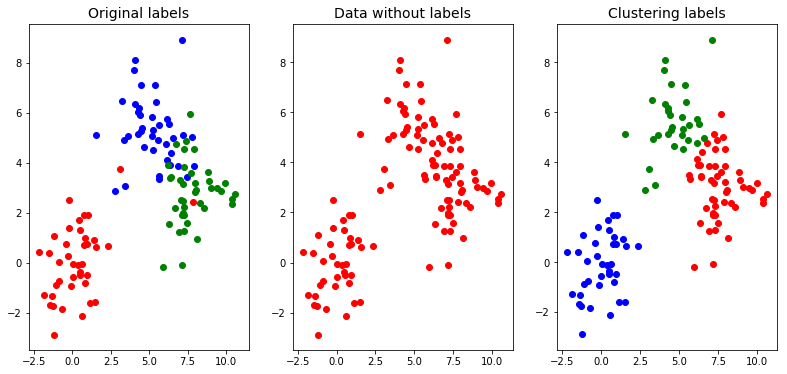

In [23]:

clf = cluster.KMeans(init='random', n_clusters=K, random_state=0) #initialize the k-means clustering
clf.fit(X) #run the k-means clustering
Zx=clf.predict(X)

plt.subplot(1,3,1)
plt.title('Original labels', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b') # b
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')  # g
fig = plt.gcf()
fig.set_size_inches((15,6))

plt.subplot(1,3,2)
plt.title('Data without labels', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='r') # b
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='r')  # g
fig = plt.gcf()
fig.set_size_inches((15,6))

plt.subplot(1,3,3)
plt.title('Clustering labels', size=14)
plt.scatter(X[(Zx==1).ravel(),0],X[(Zx==1).ravel(),1],color='r')
plt.scatter(X[(Zx==2).ravel(),0],X[(Zx==2).ravel(),1],color='b')
plt.scatter(X[(Zx==0).ravel(),0],X[(Zx==0).ravel(),1],color='g')
fig = plt.gcf()
fig.set_size_inches((13.4,6))


The K-means algorithm clusters data by trying to separate samples in $n$ groups of equal variance. In other words, the K-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean of the samples in the cluster. The means are commonly called the cluster **“centroids”**. 

      Shell the centroids belong to the original set of points?

The K-means algorithm aims to choose centroids minimizing a criterion known as the **inertia** <inertia> or **within-cluster** sum-of-squares:

  Inertia=$\displaystyle\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$

**Inertia**, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are. 

Several issues should be taken into account:

+ Inertia makes the **assumption** that clusters are **convex and isotropic** (WHY?), which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.

+ Can the algorithm assures **converging** to the global minimum? - Given enough time, K-means will always converge.

+ This algorithm requires the **number of clusters to be specified**. 

+ It scales well to **large number of samples** and has been used across a large range of application areas in many different fields.






The computation is often done several times, with different initializations of the centroids. One method to help address this issue is the k-means++ initialization scheme, which has been implemented in scikit-learn (use the init='kmeans++' parameter). This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization.

    

**Notes:** Some seeds can result in poor convergence rate, or convergence to sub-optimal clusterings:
 
 **Summary:**
 
 + (+) Select good seeds using a heuristic (e.g. seeds with large distance among them).
 + (+) Try out multiple starting points. 
 + (+) Initialize with the results of another method.
 
 
 + (-) Tends to look for spherical clusters.
 + (-) Prone to local minima stabilization.

**Homework:** Apply the k-means to the Marathon data to detect which are the groups of countries with similar average time.

### CONTENTS: ###
1.Introduction to unsupervised learning

2.Clustering

2.1 Important questions in clustering

2.2 Similarity and distance

2.3 Clustering techniques

   2.3.1 Partitional algorithms

   2.3.2 K-means algorithm

   **2.3.3 What is a good clustering? Defining metrics to measure clustering quality**    

   2.4 Dimensionality reduction by principal component analysis

   2.5 Hierarchical clustering

   2.6 Spectral clustering

   2.7 Comparing different clustering algorithms on toy datasets

3.CASE STUDY: EUROSTAT data

3.1 Applying K-means

3.2 Applying the hierarchical clustering to the case study

3.3 Applying Spectral clustering to Eurostat data.

### 2.3.3 What is a good clustering? Defining metrics to measure clustering quality

The **Rand index** or **Rand measure** (named after William M. Rand) in statistics, and in particular in data clustering, is a measure of the similarity between two data clusterings. A form of the Rand index may be defined that is adjusted for the chance grouping of elements, this is the **adjusted Rand index**. From a mathematical standpoint, Rand index is related to the accuracy, but is applicable even when class labels are not used.

Given a set of n elements $S = \{o_1, \ldots, o_n\}$ and two partitions of S to compare, $X = \{X_1, \ldots, X_r\}$, a partition of $S$ into $r$ subsets, and $Y = \{Y_1, \ldots, Y_s\}$, a partition of $S$ into $s$ subsets, define the following:

+ a, the number of pairs of elements in S that are in the same set in X and in the same set in Y
+ b, the number of pairs of elements in S that are in different sets in X and in different sets in Y
+ c, the number of pairs of elements in S that are in the same set in X and in different sets in Y
+ d, the number of pairs of elements in S that are in different sets in X and in the same set in Y.

The Rand index, R, is:
$ R = \frac{a+b}{a+b+c+d} = \frac{a+b}{{n \choose 2 }}$




0.73


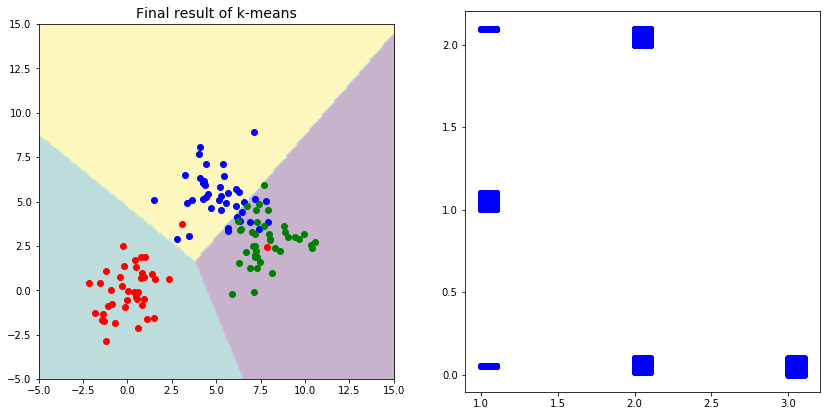

In [24]:
from sklearn import metrics

clf = cluster.KMeans(n_clusters=K, random_state=0) #initialize the k-means clustering
clf.fit(X) #run the k-means clustering
    
plt.subplot(1,2,1)
plt.title('Final result of k-means', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)

x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)

plt.subplot(1,2,2)
plt.plot(y+0.1*np.random.rand(120),clf.labels_+0.1*np.random.rand(120), 'bo')

fig = plt.gcf()
fig.set_size_inches((14,7))

print ('%.2f' % metrics.adjusted_rand_score(y.ravel(), clf.labels_))

### Compute the **homogeneity, completeness and V-Measure scores**###

A clustering result satisfies **homogeneity** if all of its clusters contain only data points which are members of the same original (a single) class.

A clustering result satisfies **completeness** if all the data points that are members of a given class are elements of the same automatic cluster.

Both scores have positive values between 0.0 and 1.0, larger values being desirable.

In [25]:
 metrics.homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

In [26]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 0, 1, 2]))

1.000


In [27]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3]))

1.000


In [28]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 1, 0, 1]))

0.000


In [29]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 0, 0, 0]))

0.000


In [30]:
print(metrics.completeness_score([0, 0, 1, 1], [1, 1, 0, 0]))

1.0


In [31]:
print(metrics.completeness_score([0, 0, 1, 1], [0, 0, 0, 0]))

1.0


In [32]:
print(metrics.completeness_score([0, 1, 2, 3], [0, 0, 1, 1]))

1.0


In [33]:
print(metrics.completeness_score([0, 0, 1, 1], [0, 1, 0, 1]))

0.0


In [34]:
print(metrics.completeness_score([0, 0, 0, 0], [0, 1, 2, 3]))

0.0


**V-measure** cluster labeling given a ground truth:
The V-measure is the harmonic mean between homogeneity and completeness:

  $v = 2 * (homogeneity * completeness) / (homogeneity + completeness)$

Is the  metric dependent of the absolute values of the labels?: will a permutation of the class or cluster label values change the score value in any way?

Is the metric symmetric wrt the switching label_true with label_pred?

This can be useful to measure the agreement of two independent label assignments strategies on the same dataset when the real ground truth is not known.

Perfect labelings are both homogeneous and complete, hence have score 1.0:

In [35]:
print(metrics.v_measure_score([0, 0, 1, 1], [0, 0, 1, 1]))

print (metrics.v_measure_score([0, 0, 1, 1], [1, 1, 0, 0]))

1.0
1.0


**Question:** Labelings that **assign all classes members to the same clusters** are: ______________, but not __________:

In [36]:
print("%.3f" % metrics.completeness_score([0, 1, 2, 3], [0, 0, 0, 0]))

print("%.3f" % metrics.homogeneity_score([0, 1, 2, 3], [0, 0, 0, 0]))

print("%.3f" % metrics.v_measure_score([0, 1, 2, 3], [0, 0, 0, 0]))

print("%.3f" % metrics.v_measure_score([0, 0, 1, 2], [0, 0, 1, 1]))

print("%.3f" % metrics.v_measure_score([0, 1, 2, 3], [0, 0, 1, 1]))

1.000
0.000
0.000
0.800
0.667


Labelings that have **pure clusters with members coming from the same classes** are _____________ but un-necessary splits harm ____________ and thus penalize V-measure as well:

In [37]:
print("%.3f" % metrics.v_measure_score([0, 0, 1, 1], [0, 0, 1, 2]))

print("%.3f" % metrics.v_measure_score([0, 0, 1, 1], [0, 1, 2, 3]))

0.800
0.667


If classes members are **completely split across different clusters**, the assignment is totally incomplete, hence the V-Measure is null:

In [38]:
print("%.3f" % metrics.v_measure_score([0, 0, 0, 0], [0, 1, 2, 3]))

0.000


Clusters that include samples from **totally different classes** totally destroy the ____________ of the labeling, hence:

In [39]:
print("%.3f" % metrics.v_measure_score([0, 0, 1, 1], [0, 0, 0, 0]))

0.000


**Advantages**

+ **Bounded scores**: 0.0 is as bad as it can be, 1.0 is a perfect score.

+ **Intuitive interpretation**: clustering with bad V-measure can be qualitatively analyzed in terms of homogeneity and completeness to better feel what ‘kind’ of mistakes is done by the assignment.

+ **No assumption** is made on the cluster structure: can be used to compare clustering algorithms such as K-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.

**Drawbacks**

+ The previously introduced metrics are **not normalized with regards to random labeling**: this means that depending on the number of samples, clusters and ground truth classes, a completely random labeling will not always yield the same values for homogeneity, completeness and hence V-measure. In particular random labeling won’t yield zero scores especially when the number of clusters is large.

+ This problem can safely be ignored when **the number of samples** is high i.e. more than a thousand and the number of clusters is less than 10. 

+ These metrics require the **knowledge of the ground truth classes** while almost never available in practice or require manual assignment by human annotators (as in the supervised learning setting).

<center><img src="images/1gen.png">
</center>

And if we do not have ground truth?


The **Silhouette Coefficient** is calculated using the *mean intra-cluster distance* (a) and the *mean nearest-cluster distance* (b) for each sample. The Silhouette Coefficient for a sample is:

                           (b - a) / max(a, b).

where b is the distance between a sample and the nearest cluster that the sample is not part of. Note that Silhouette Coefficent is only defined if number of labels is: $ 2 <= n_{labels} <= n_{samples} - 1$ (WHY?).

**Test:** 

+ The best value is _____.

+ The worst value is _____. 

+ Pixel values near 0 indicate ________. 


**Advantages**

The score is bounded between -1 and +1. Scores around zero indicate ___________ clusters (WHY?).

The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

**Drawbacks**

The Silhouette Coefficient is generally higher for convex clusters. WHY?

In [40]:
clf = cluster.KMeans(n_clusters=K, init='k-means++',  random_state=0, max_iter=300, n_init=10) 
                                        #initialize the k-means clustering
clf.fit(X)                              #run the k-means clustering

print('Final evaluation of the clustering:')

print('Inertia: %.2f' %  clf.inertia_)

print('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y.ravel(), clf.labels_))

print('Homogeneity %.2f' %  metrics.homogeneity_score(y.ravel(), clf.labels_))

print('Completeness %.2f' %  metrics.completeness_score(y.ravel(), clf.labels_))
             
print('V_measure %.2f' %  metrics.v_measure_score(y.ravel(), clf.labels_))

print('Silhouette %.2f' %  metrics.silhouette_score(X, clf.labels_,  metric='euclidean'))

Final evaluation of the clustering:
Inertia: 349.75
Adjusted_rand_score 0.73
Homogeneity 0.74
Completeness 0.75
V_measure 0.75
Silhouette 0.54


In [41]:
clf1 = cluster.KMeans(n_clusters=K,  init='random', random_state=0, max_iter=2, n_init=2) 
                                    #initialize the k-means clustering
clf1.fit(X)                         #run the k-means clustering

print('Final evaluation of the clustering:')

print ('Inertia: %.2f' % clf1.inertia_)

print ('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y.ravel(), clf1.labels_))

print ('Homogeneity %.2f' % metrics.homogeneity_score(y.ravel(), clf1.labels_))

print ('Completeness %.2f' % metrics.completeness_score(y.ravel(), clf1.labels_))
             
print ('V_measure %.2f' % metrics.v_measure_score(y.ravel(), clf1.labels_))

print ('Silhouette %.2f' % metrics.silhouette_score(X, clf1.labels_, metric='euclidean'))

Final evaluation of the clustering:
Inertia: 360.96
Adjusted_rand_score 0.77
Homogeneity 0.73
Completeness 0.73
V_measure 0.73
Silhouette 0.53


**(OPTIONAL)** *Adjusted Mutual Information (AMI)* is an adjustment of the Mutual Information (MI) score to account for chance. It accounts for the fact that the MI is generally higher for two clusterings with a larger number of clusters, regardless of whether there is actually more information shared. For two clusterings U and V, the AMI is given as:

$ AMI(U, V) = [MI(U, V) - E(MI(U, V))] / [max(H(U), H(V)) - E(MI(U, V))]$.

This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

This metric is furthermore symmetric: switching label_true with label_pred will return the same score value. This can be useful to measure the agreement of two independent label assignments strategies on the same dataset when the real ground truth is not known.

Be mindful that this function is an order of magnitude slower than other metrics, such as the Adjusted Rand Index.

**Advantages**

+ Random (uniform) label assignments have an AMI score close to 0.0 for any value of n_clusters and n_samples (which is not the case for raw Mutual Information or the V-measure for instance).

+ Bounded range [0, 1]: Values close to zero indicate two label assignments that are largely independent, while values close to one indicate significant agreement. Further, values of exactly 0 indicate purely independent label assignments and a AMI of exactly 1 indicates that the two label assignments are equal (with or without permutation).

+ No assumption is made on the cluster structure: can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.

**Drawbacks**

+ Contrary to inertia, MI-based measures require the knowledge of the ground truth classes while almost never available in practice or requires manual assignment by human annotators (as in the supervised learning setting).

However MI-based measures can also be useful in purely unsupervised setting as a building block for a Consensus Index that can be used for clustering model selection.

+ NMI and MI are not adjusted against chance.

# And how can dimensionality affect the clustering results?##

## How to visualize the data in 60-dimensional space?##

## 2.4 Dimensionality reduction

Let us consider a clustering  of handwritten digits data.  Let us consider the [letter dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits). Python source code: [plot_kmeans_digits.py](http://scikit-learn.org/stable/_downloads/plot_kmeans_digits.py).
        

In [42]:
from IPython.display import HTML
HTML('<iframe src=http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits  width=900 height=500></iframe>')

**How to visualize the $R^{64}$ feature space?**

We need a dimensionality reduction technique to:

    + visualize the data,
    
    + remove non-relevant information (redundancy), 
    
    + speed up the clustering algorithms.

In [43]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.datasets import load_digits 
np.random.seed(42)

# Load the digit data
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [44]:
data = scale(digits.data)  #Standardize a dataset along any axis, 
                           #Center to the mean and component wise scale to unit variance.

print(digits.target[1:35])  # data labels

[1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6]


In [45]:
import pylab as pl        #pylab combines pyplot with numpy into a single namespace. 
                          #For more information, look at: http://wiki.scipy.org/PyLab
pl.gray()                 #defines the gray colormap to display images


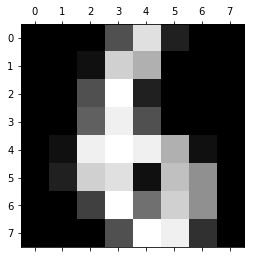

In [46]:
pl.matshow(digits.images[34]) 
plt.show() 

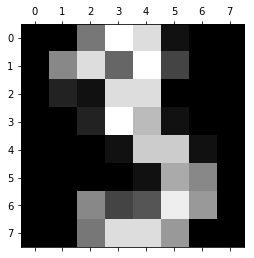

In [47]:
pl.matshow(digits.images[3]) 
plt.show() 

In [48]:
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target
sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d" % (n_digits, n_samples, n_features))

n_digits: 10, 	 n_samples 1797, 	 n_features 64


In [49]:
import pylab as pl
from matplotlib import pyplot as plt #Provides a MATLAB-like plotting framework.
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

ones=data[labels==1]
fives=data[labels==5]

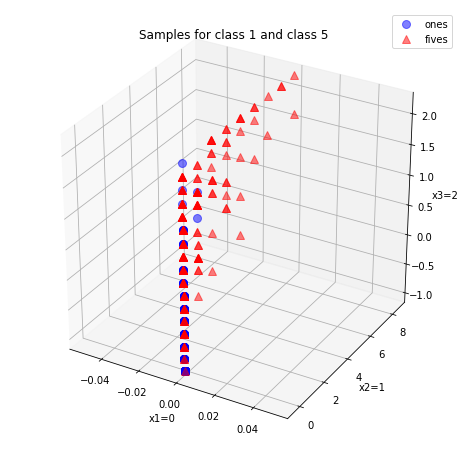

In [50]:
x1,x2,x3=0,1,2 #let's consider the first three features

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(ones[:, x1], ones[:, x2], ones[:, x3], 'o', markersize=8, color='blue', alpha=0.5, label='ones')
ax.plot(fives[:, x1], fives[:, x2], fives[:, x3], '^', markersize=8, alpha=0.5, color='red', label='fives')

plt.title('Samples for class 1 and class 5')
ax.legend(loc='upper right')
ax.set_xlabel('x1='+str(x1))
ax.set_ylabel('x2='+str(x2))
ax.set_zlabel('x3='+str(x3))

plt.show()
plt.figure()

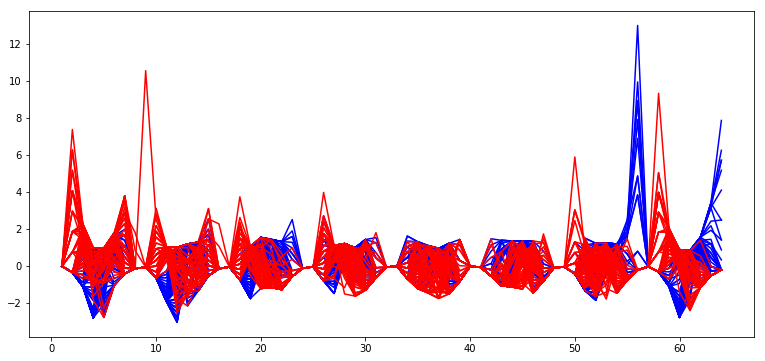

In [51]:
for i in range(ones.shape[1]):
    plt.plot(range(1,n_features+1), ones[i,:], c='b')
for i in range(fives.shape[1]):
    plt.plot(range(1,n_features+1), fives[i,:], c='r')

fig = plt.gcf()
fig.set_size_inches((13,6))

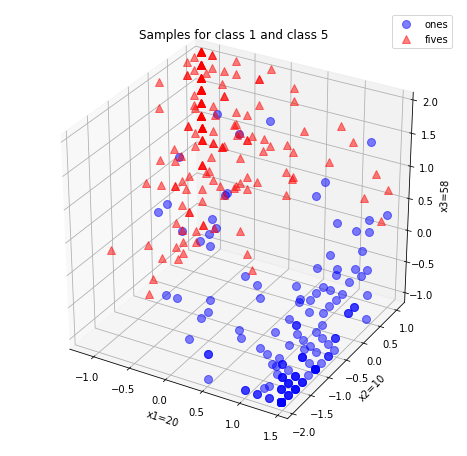

In [52]:
dif=abs(np.mean(fives,axis=0)-np.mean(ones,axis=0))
ind=np.argsort(dif) # look for the biggest difference
ind=ind[::-1]   # sort and reverse the order
x1,x2,x3=ind[0:3] # consider the most discriminant features

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(ones[:, x1], ones[:, x2], ones[:, x3], 'o', markersize=8, color='blue', alpha=0.5, label='ones')
ax.plot(fives[:, x1], fives[:, x2], fives[:, x3], '^', markersize=8, alpha=0.5, color='red', label='fives')

plt.title('Samples for class 1 and class 5')
ax.legend(loc='upper right')
ax.set_xlabel('x1='+str(x1))
ax.set_ylabel('x2='+str(x2))
ax.set_zlabel('x3='+str(x3))
plt.show()

**Which features (dimensions) to choose?**

**Principal Component Analysis (PCA)** is a statistical procedure that decomposes a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. 

PCA uses an *orthogonal transformation* to convert a set of observations of possibly correlated variables into a set of values of *linearly uncorrelated* variables called **principal components**. 

The **number** of principal components is less than or equal to the number of original variables. 

This transformation is defined in such a way that the *first principal component* has the *largest possible variance* (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to (i.e., uncorrelated with) the preceding components. 

<center><img src="images/pca1.png">
</center>

**How to obtain it?:** The principal components are obtained as the **eigenvectors of the covariance matrix**, hence are *orthogonal*. 

In scikit-learn, PCA is implemented as a transformer object that learns $n$ components in its *fit* method, and can be used on new data to project it on these components.

In [53]:
# Do the PCA decomposition!
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
print(np.concatenate((ones,fives)).shape)

newdataPCA=pca.fit_transform(np.concatenate((ones,fives))) #concatenates vectors row by row



(364, 64)


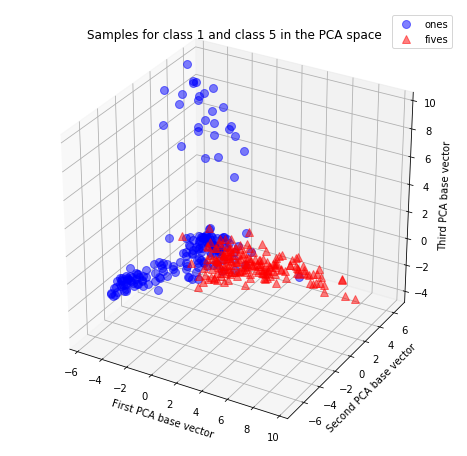

In [54]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10

ax.plot(newdataPCA[1:ones.shape[0], 0], newdataPCA[1:ones.shape[0], 1],\
    newdataPCA[1:ones.shape[0], 2], 'o', markersize=8, color='blue', alpha=0.5, label='ones')
ax.plot(newdataPCA[ones.shape[0]:, 0], newdataPCA[ones.shape[0]:, 1],\
    newdataPCA[ones.shape[0]:, 2], '^', markersize=8, alpha=0.5, color='red', label='fives')

plt.title('Samples for class 1 and class 5 in the PCA space')
ax.legend(loc='upper right')
ax.set_xlabel('First PCA base vector')
ax.set_ylabel('Second PCA base vector')
ax.set_zlabel('Third PCA base vector')
plt.show()

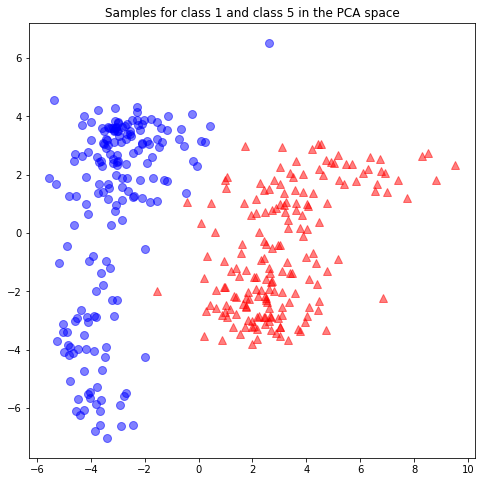

In [55]:
fig = plt.figure(figsize=(8,8))
plt.rcParams['legend.fontsize'] = 10

plt.plot(newdataPCA[1:ones.shape[0], 0], newdataPCA[1:ones.shape[0], 1], 'o', markersize=8, color='blue', alpha=0.5, label='ones')
plt.plot(newdataPCA[ones.shape[0]:, 0], newdataPCA[ones.shape[0]:, 1], '^', markersize=8, alpha=0.5, color='red', label='fives')

plt.title('Samples for class 1 and class 5 in the PCA space')
plt.show()

### Comparison of performance of K-means with different strategies

Let's go back to compare the K-means performance using various  strategies in terms of runtime and quality of the results. As the groundtruth is known here, we also apply different cluster quality metrics to judge the goodness of the fit of the cluster labels to the groundtruth.

In [56]:
estimator=KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
estimator.fit(data)

print ('Silhouette score is: %.3f' % metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean'))

Silhouette score is: 0.144


In [57]:


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))
    

In [58]:
print(79 * '_')
print('% 9s' % 'initial-n    time  inertia    homo   compl  v-meas    silhouette')

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
                              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
                              name="random", data=data)

                    # In this case, the seeding of the centers is deterministic, hence we run the
                                        # k-means algorithm only once with n_init=1.
pca = PCA(n_components=n_digits).fit(data)

bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
                              name="PCA-based", data=data)
print(79 * '_')

_______________________________________________________________________________
initial-n    time  inertia    homo   compl  v-meas    silhouette
k-means++   0.32s    69661   0.670   0.709   0.689    0.129
   random   0.20s    69430   0.599   0.647   0.622    0.158
PCA-based   0.02s    71820   0.673   0.715   0.693    0.124
_______________________________________________________________________________


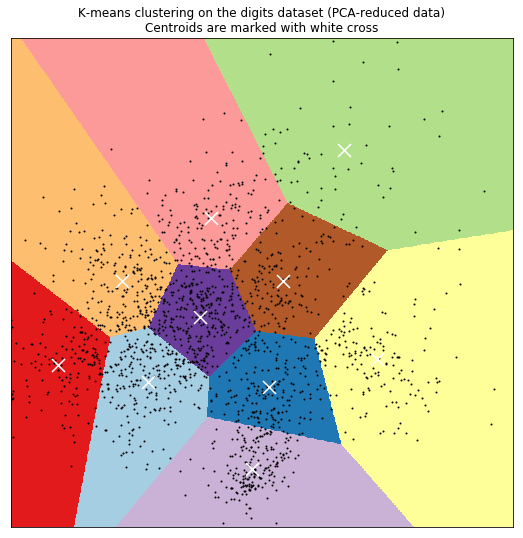

In [59]:
###############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

                    # Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02             # point in the mesh [x_min, m_max]x[y_min, y_max].

        # Plot the decision boundary. For that, we will assign a color to each point
x_min, x_max = reduced_data[:, 0].min() + 1, reduced_data[:, 0].max() - 1
y_min, y_max = reduced_data[:, 1].min() + 1, reduced_data[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
Z = Z.reshape(xx.shape)

#visualize
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                       cmap=plt.cm.Paired,aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

fig = plt.gcf()
fig.set_size_inches((9,9))